In [1]:
!pip install matplotlib --force

     |████████████████████████████████| 11.6MB 5.4MB/s eta 0:00:01
     |████████████████████████████████| 163kB 31.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 31.0MB/s eta 0:00:01
     |████████████████████████████████| 14.5MB 29.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
     |████████████████████████████████| 2.2MB 29.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Found existing installation: certifi 2019.9.11
    Uninstalling certifi-2019.9.11:
      Successfully uninstalled certifi-2019.9.11
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0
  Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully 

In [2]:
!pip install pandas

     |████████████████████████████████| 10.5MB 6.4MB/s eta 0:00:01    |██▏                             | 716kB 6.4MB/s eta 0:00:02


In [3]:
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import transforms
import copy
import tqdm
from PIL import Image

%matplotlib inline

In [5]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]
Get:2 http://archive.ubuntu.com/ubuntu xenial InRelease [247 kB]
Get:3 http://security.ubuntu.com/ubuntu xenial-security/main amd64 Packages [1185 kB]
Get:4 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [109 kB]       
Get:5 http://security.ubuntu.com/ubuntu xenial-security/restricted amd64 Packages [12.7 kB]
Get:6 http://security.ubuntu.com/ubuntu xenial-security/universe amd64 Packages [639 kB]
Get:7 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [107 kB]   
Get:8 http://security.ubuntu.com/ubuntu xenial-security/multiverse amd64 Packages [6680 B]
Get:9 http://archive.ubuntu.com/ubuntu xenial/main amd64 Packages [1558 kB]
Get:10 http://archive.ubuntu.com/ubuntu xenial/restricted amd64 Packages [14.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu xenial/universe amd64 Packages [9827 kB]
Get:12 http://archive.ubuntu.com/ubuntu xenial/multiverse amd64 Packages [176 kB]
Get:13 http://archive.

In [6]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  zip
The following NEW packages will be installed:
  unzip
0 upgraded, 1 newly installed, 0 to remove and 64 not upgraded.
Need to get 158 kB of archives.
After this operation, 530 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu xenial/main amd64 unzip amd64 6.0-20ubuntu1 [158 kB]
Fetched 158 kB in 1s (131 kB/s) 
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package unzip.
(Reading database ... 11012 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-20ubuntu1_amd64.deb ...
Unpacking unzip (6.0-20ubuntu1) ...
Setting up unzip (6.0-20ubuntu1) ...


In [7]:
!unzip /kqi/input/training/*/train.zip

Archive:  /kqi/input/training/22468844/train.zip
   creating: train/
  inflating: train/N_00001.jpg       
  inflating: train/N_00002.jpg       
  inflating: train/N_00003.jpg       
  inflating: train/N_00004.jpg       
  inflating: train/N_00005.jpg       
  inflating: train/N_00006.jpg       
  inflating: train/N_00007.jpg       
  inflating: train/N_00008.jpg       
  inflating: train/N_00009.jpg       
  inflating: train/N_00010.jpg       
  inflating: train/N_00011.jpg       
  inflating: train/N_00012.jpg       
  inflating: train/N_00013.jpg       
  inflating: train/N_00014.jpg       
  inflating: train/N_00015.jpg       
  inflating: train/N_00016.jpg       
  inflating: train/N_00017.jpg       
  inflating: train/N_00018.jpg       
  inflating: train/N_00019.jpg       
  inflating: train/N_00020.jpg       
  inflating: train/N_00021.jpg       
  inflating: train/N_00022.jpg       
  inflating: train/N_00023.jpg       
  inflating: train/N_00024.jpg       
  inflating: train/

In [8]:
!unzip /kqi/input/testing/*/test.zip

Archive:  /kqi/input/testing/22468845/test.zip
   creating: test/
  inflating: test/N_15001.jpg        
  inflating: test/N_15002.jpg        
  inflating: test/N_15003.jpg        
  inflating: test/N_15004.jpg        
  inflating: test/N_15005.jpg        
  inflating: test/N_15006.jpg        
  inflating: test/N_15007.jpg        
  inflating: test/N_15008.jpg        
  inflating: test/N_15009.jpg        
  inflating: test/N_15010.jpg        
  inflating: test/N_15011.jpg        
  inflating: test/N_15012.jpg        
  inflating: test/N_15013.jpg        
  inflating: test/N_15014.jpg        
  inflating: test/N_15015.jpg        
  inflating: test/N_15016.jpg        
  inflating: test/N_15017.jpg        
  inflating: test/N_15018.jpg        
  inflating: test/N_15019.jpg        
  inflating: test/N_15020.jpg        
  inflating: test/N_15021.jpg        
  inflating: test/N_15022.jpg        
  inflating: test/N_15023.jpg        
  inflating: test/N_15024.jpg        
  inflating: test/N_15

In [9]:
data_dir = '/kqi/output/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [10]:
train_files = os.listdir(train_dir)

In [13]:
print(len(train_files))

30000


In [14]:
test_files = os.listdir(test_dir)

In [15]:
print(len(test_files))

10000


In [16]:
class ConcreteCrackDataset(Dataset):
    def __init__(self, file_list, dir, mode='train', transform = None):
        self.file_list = file_list
        self.dir = dir
        self.mode= mode
        self.transform = transform
        if self.mode == 'train':
            if 'P' in self.file_list[0] :
                self.label = 1 
            else:
                self.label = 0
            
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx]))
        if self.transform:
            img = self.transform(img)
        if self.mode == 'train':
            img = img.numpy()
            return img.astype('float32'), self.label
        else:
            img = img.numpy()
            return img.astype('float32'), self.file_list[idx]
        
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])

positive_files = [tf for tf in train_files if 'P' in tf ]
negative_files = [tf for tf in train_files if 'N' in tf]

positive_images = ConcreteCrackDataset(positive_files, train_dir, transform = data_transform)
negative_images = ConcreteCrackDataset(negative_files, train_dir, transform = data_transform)

In [17]:
concretecracks = ConcatDataset([positive_images, negative_images])

In [18]:
dataloader = DataLoader(concretecracks, batch_size = 32, shuffle=True, num_workers=4)

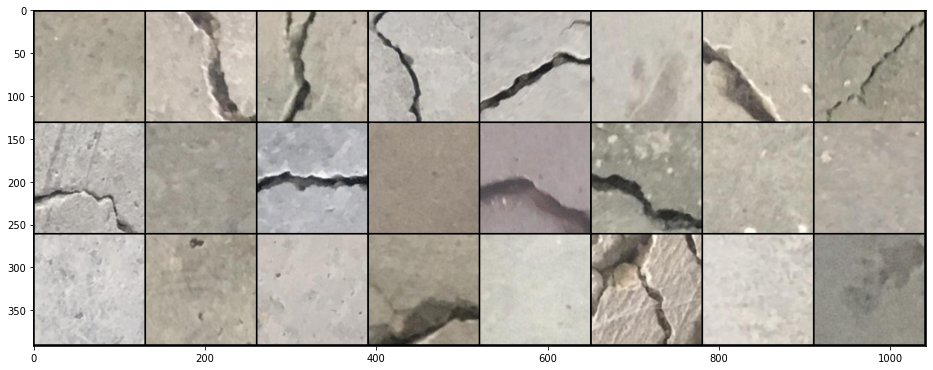

In [19]:
samples, labels = iter(dataloader).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

In [20]:
# transfer learning

device = 'cuda'
model = torchvision.models.densenet121(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30.8M/30.8M [00:00<00:00, 40.4MB/s]


In [21]:
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 500),
    nn.Linear(500, 2)
)

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002, amsgrad=True)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[500,1000,1500], gamma=0.5)

[Epoch 1/3] Iteration 200 -> Train Loss: 0.1011, Accuracy: 1.000
[Epoch 1/3] Iteration 400 -> Train Loss: 0.0277, Accuracy: 1.000
[Epoch 1/3] Iteration 600 -> Train Loss: 0.0179, Accuracy: 1.000
[Epoch 1/3] Iteration 800 -> Train Loss: 0.0196, Accuracy: 1.000
[Epoch 2/3] Iteration 1000 -> Train Loss: 0.0137, Accuracy: 1.000
[Epoch 2/3] Iteration 1200 -> Train Loss: 0.0078, Accuracy: 1.000
[Epoch 2/3] Iteration 1400 -> Train Loss: 0.0084, Accuracy: 1.000
[Epoch 2/3] Iteration 1600 -> Train Loss: 0.0089, Accuracy: 1.000
[Epoch 2/3] Iteration 1800 -> Train Loss: 0.0081, Accuracy: 1.000
[Epoch 3/3] Iteration 2000 -> Train Loss: 0.0054, Accuracy: 1.000
[Epoch 3/3] Iteration 2200 -> Train Loss: 0.0066, Accuracy: 1.000
[Epoch 3/3] Iteration 2400 -> Train Loss: 0.0065, Accuracy: 1.000
[Epoch 3/3] Iteration 2600 -> Train Loss: 0.0053, Accuracy: 1.000
[Epoch 3/3] Iteration 2800 -> Train Loss: 0.0046, Accuracy: 1.000


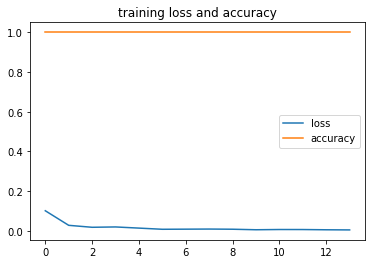

In [22]:
epochs = 3
itr = 1
p_itr = 200
model.train()
total_loss = 0
loss_list = []
acc_list = []
for epoch in range(epochs):
    for samples, labels in dataloader:
        samples, labels = samples.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(samples)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        scheduler.step()
        
        if itr%p_itr == 0:
            pred = torch.argmax(output, dim=1)
            correct = pred.eq(labels)
            acc = torch.mean(correct.float())
            print('[Epoch {}/{}] Iteration {} -> Train Loss: {:.4f}, Accuracy: {:.3f}'.format(epoch+1, epochs, itr, total_loss/p_itr, acc))
            loss_list.append(total_loss/p_itr)
            acc_list.append(acc)
            total_loss = 0
            
        itr += 1

plt.plot(loss_list, label='loss')
plt.plot(acc_list, label='accuracy')
plt.legend()
plt.title('training loss and accuracy')
plt.show()

In [24]:
filename_pth = 'ckpt_densenet121_concrete.pth'
torch.save(model.state_dict(), filename_pth)

test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

testset = ConcreteCrackDataset(test_files, test_dir, mode='test', transform = test_transform)
testloader = DataLoader(testset, batch_size = 32, shuffle=False, num_workers=4)

In [25]:
model.eval()
fn_list = []
pred_list = []
for x, fn in testloader:
    with torch.no_grad():
        x = x.to(device)
        output = model(x)
        pred = torch.argmax(output, dim=1)
        fn_list += [n[:-4] for n in fn]
        pred_list += [p.item() for p in pred]


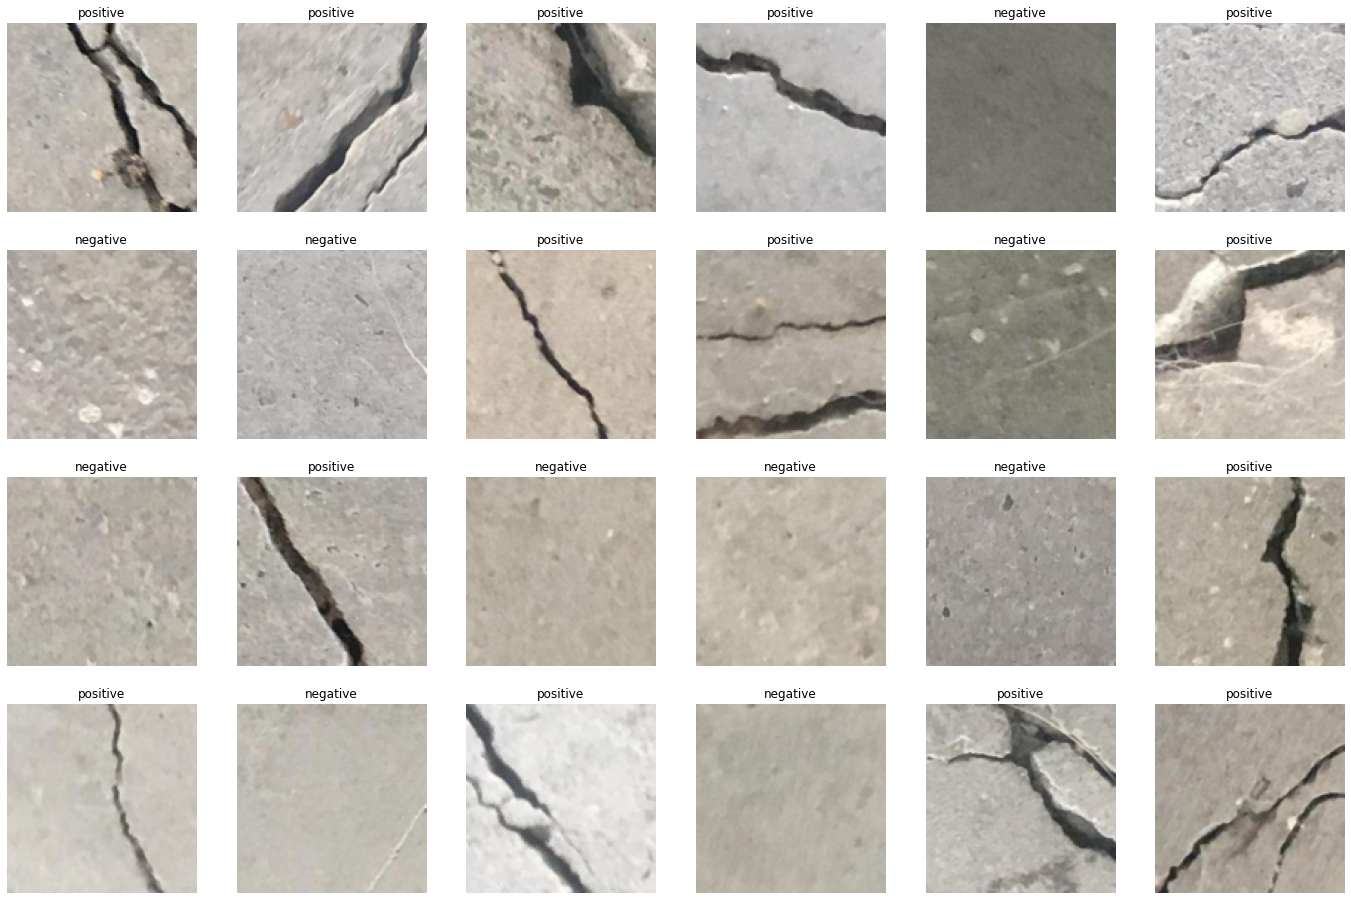

In [26]:
samples, _ = iter(testloader).next()
samples = samples.to(device)
fig = plt.figure(figsize=(24, 16))
fig.tight_layout()
output = model(samples[:24])
pred = torch.argmax(output, dim=1)
pred = [p.item() for p in pred]
ad = {0:'negative', 1:'positive'}
for num, sample in enumerate(samples[:24]):
    plt.subplot(4,6,num+1)
    plt.title(ad[pred[num]])
    plt.axis('off')
    sample = sample.cpu().numpy()
    plt.imshow(np.transpose(sample, (1,2,0)))